In [1]:
import os
import glob
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input


data = []

#Cargar los datos con OpenCv
paths = ["/kaggle/input/real-life-violence-situations/new_violence"]

#Mostrar imagen
def imshow(img):
    fig,ax = plt.subplots(1,1,figsize = (5,5))
    ax.imshow(img)
    plt.show()

#agregar las etiquetas de salida dadas las carpetas con su nombre
possible_labels = os.listdir(paths[0])
print(possible_labels)

2024-05-28 16:41:56.878377: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 16:41:56.878527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 16:41:57.055582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


['non_violence', 'violence']


# Guardando los datos en el array data

In [4]:
for label_int, label_str in enumerate(possible_labels):
       for filename in glob.glob(os.path.join(paths[0],label_str, "*.jpg")):
            img = cv2.imread(filename.replace("\\", "/"))
            if img is not None:  # Verificar si la imagen se ha leído correctamente
                try:
                    resized_img = cv2.resize(img, (416, 416))
                    data.append([label_int, resized_img])
                except Exception as e:
                    print(f"Error resizing image {filename}: {e}")
            else:
                print(f"Warning: Unable to read image {filename} Please check the file path and format.")
print(len(data))

11073


# Insertando los datos (training, validacion y testing) en arrays de numpy 

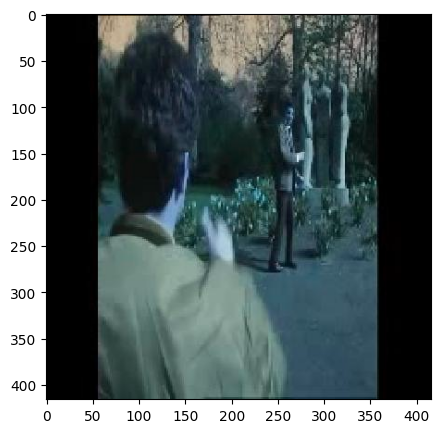

non_violence


In [5]:
#Se Barajea el arreglo data para que no inserte los datos por carpetas
random.Random(0).shuffle(data)

#Se crea arreglos para los conjuntos de validacion, tewsting y entrenamiento
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

#Se recorre la lista data para agregar las imagenes a sus correspondientes arreglos
for i,sample in enumerate(data):
    label= sample[0]
    img = sample[1]
    if i <= 0.8*len(data):
        x_train.append(img)
        y_train.append(label)
    elif i >0.8*len(data) and i <= 0.9*len(data):
        x_val.append(img)
        y_val.append(label)
    else:
        x_test.append(img)
        y_test.append(label)

#Convirtiendo los arrays en arreglos de NumPy para Tensorflow
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

#Mostrar Imagen en la pos 0
imshow(x_train[0])
print(possible_labels[y_train[0]])

# Convirtiendo las labels de las imagenes en One-Hot Encoding

In [6]:
y_trainOneHot = tf.one_hot(y_train,len(possible_labels))
y_valOneHot = tf.one_hot(y_val,len(possible_labels))
y_testOneHot = tf.one_hot(y_test,len(possible_labels))
print("done")

done
